In [2]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

#Libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style("darkgrid")

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import collections


from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from scipy.stats import norm
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
pd.set_option("display.max_columns", 999)
pd.get_option("display.max_columns")

pd.set_option("display.max_rows", 999)
pd.get_option("display.max_rows")

%matplotlib inline

Using TensorFlow backend.


In [3]:
df = pd.read_csv("Prepared_Data/bureau.csv")
df.head()

SK_ID_CURR  TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0      100002       1      0.083037      0.262949      0.139376   
1      100003       0      0.311267      0.622246     -1.000000   
2      100004       0     -1.000000      0.555912      0.729567   
3      100007       0     -1.000000      0.322738     -1.000000   
4      100008       0     -1.000000      0.354225      0.621226   

   nbr_active_sum  nbr_sold_sum  credit_card  car_loan  mortgage_loan  \
0               2             0            4         0              0   
1               1             0            2         0              0   
2               0             0            0         0              0   
3               0             0            0         0              0   
4               1             0            0         0              0   

   micro_loan  business_loan  max_credit_prolong  min_loan_tenure  \
0           0              0                   0              0.0   
1           0              0                   0              0.0   
2           0              0                   0              0.0   
3           0              0                   0              1.0   
4           0              0                   0              0.0   

   avg_loan_tenure  closed_before_maturity  distinct_loan_payment_default  \
0              1.0                       3                              3   
1              2.0                       1                              0   
2              1.0                       1                              0   
3              1.0                       0                              0   
4              1.0                       1                              0   

   max_loan_payment_default_days  percentge_consumer_loan  \
0                            1.0                      0.5   
1                            0.0                      0.5   
2                            0.0                      1.0   
3                            0.0                      1.0   
4                            0.0                      1.0   

   percentge_nbr_closed_sum  
0                  0.750000  
1                  0.750000  
2                  1.000000  
3                  1.000000  
4                  0.666667

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263491 entries, 0 to 263490
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   SK_ID_CURR                     263491 non-null  int64  
 1   TARGET                         263491 non-null  int64  
 2   EXT_SOURCE_1                   263491 non-null  float64
 3   EXT_SOURCE_2                   263491 non-null  float64
 4   EXT_SOURCE_3                   263491 non-null  float64
 5   nbr_active_sum                 263491 non-null  int64  
 6   nbr_sold_sum                   263491 non-null  int64  
 7   credit_card                    263491 non-null  int64  
 8   car_loan                       263491 non-null  int64  
 9   mortgage_loan                  263491 non-null  int64  
 10  micro_loan                     263491 non-null  int64  
 11  business_loan                  263491 non-null  int64  
 12  max_credit_prolong            

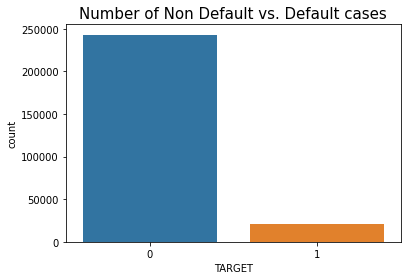

In [5]:
#Frauds vs. Non-Frauds
sns.countplot('TARGET', data=df)
plt.title('Number of Non Default vs. Default cases', fontsize = 15);

In [6]:
df.TARGET.value_counts()[1]

20368

In [7]:
print('Percentage of No Frauds: {}%'.format(round(df.TARGET.value_counts()[0]/len(df) * 100.0,2)))
print('Percentage of Frauds: {}%'.format(round(df.TARGET.value_counts()[1]/len(df) * 100.0,2)))

Percentage of No Frauds: 92.27%
Percentage of Frauds: 7.73%


In [8]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

In [9]:
#SMOTE OVERSAMPLING
X = df.drop('TARGET', axis=1)
y = df['TARGET']

In [10]:
X = X.drop("SK_ID_CURR", axis=1)

In [11]:
#Split the data using train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
print(X_train.shape)
print(y_train.shape)

(184443, 18)
(184443,)


In [13]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = X_train_stand.columns

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler()
    
    # transform the training data column
    X_train_stand[i] = scale.fit_transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [14]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train_stand.shape)) 
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape)) 
  
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0))) 

Before OverSampling, the shape of train_X: (184443, 18)
Before OverSampling, the shape of train_y: (184443,) 

Before OverSampling, counts of label '1': 14344
Before OverSampling, counts of label '0': 170099


In [15]:
# SMOTE OVERSAMPLING
sm = SMOTE(random_state = 2) 
X_train_SMOTE, y_train_SMOTE = sm.fit_sample(X_train_stand, y_train.ravel()) 

In [16]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_SMOTE.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_SMOTE.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_SMOTE == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_SMOTE == 0))) 

After OverSampling, the shape of train_X: (340198, 18)
After OverSampling, the shape of train_y: (340198,) 

After OverSampling, counts of label '1': 170099
After OverSampling, counts of label '0': 170099


In [17]:
#Convert to arrays to feed to the classifications algorithms
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000,n_jobs=-1),
    "Support Vector Classifier": LinearSVC(dual=False, random_state=0),
    "Decision Tree": DecisionTreeClassifier(),
    "RandomForest":RandomForestClassifier(max_depth = 6, n_jobs=-1),
    "Gradient Boosting":XGBClassifier(objective='binary:logistic',max_depth =3, n_estimators=10, eval_metric='logloss', seed=123, n_jobs=-1,verbosity=3)
}

In [18]:
#Calculate the cross-validation score for each classifier 8;24
print('Cross-Validation Scores:-')
for key, classifier in classifiers.items():
        classifier.fit(X_train_SMOTE, y_train_SMOTE)
        cv_score = cross_val_score(classifier, X_train_SMOTE, y_train_SMOTE, cv=StratifiedKFold(shuffle = True),scoring='accuracy',n_jobs=-1)
        precision = cross_val_score(classifier, X_train_SMOTE, y_train_SMOTE, cv=StratifiedKFold(shuffle = True),scoring='precision',n_jobs=-1)
        recall = cross_val_score(classifier, X_train_SMOTE, y_train_SMOTE, cv=StratifiedKFold(shuffle = True),scoring='recall',n_jobs=-1)
        auc = cross_val_score(classifier, X_train_SMOTE, y_train_SMOTE, cv=StratifiedKFold(shuffle = True),scoring='roc_auc',n_jobs=-1)
        print('{}: {} : {} : {} : {}'.format(key,round(cv_score.mean()*100.0, 2),
                                     round(recall.mean()*100.0, 2),
                                     round(precision.mean()*100.0, 2),
                                     round(auc.mean()*100.0, 2),))
    

Cross-Validation Scores:-
Logistic Regression: 64.06 : 61.27 : 64.89 : 69.52
Support Vector Classifier: 64.05 : 60.9 : 65.01 : 69.51
Decision Tree: 85.85 : 87.36 : 84.81 : 85.77
RandomForest: 73.34 : 74.25 : 72.92 : 81.31


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:03:35] DEBUG: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/gbm/gbtree.cc:154: Using tree method: 2
[10:03:36] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:03:36] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:03:36] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:03:36] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:03:37] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nod

In [19]:
 params = {
    "Logistic Regression": {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    "Support Vector Classifier": {'C': [0.5, 0.7, 0.9, 1]},
    "Decision Tree": {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))},
     "RandomForest": {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))},
     "Gradient Boosting":{
     "eta"    : [0.05, 0.10, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5],
     "gamma"            : [ 0.1, 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.5 , 0.7 ]
     }

}

In [20]:

#Using Grid search for finding the most optimal hyperparameters
def gridsearch(classifier, params):
    grid_classifier = GridSearchCV(classifier, params)
    grid_classifier.fit(X_train_SMOTE, y_train_SMOTE)
    best_classifier = grid_classifier.best_estimator_
    return best_classifier

In [21]:
#Using Grid search for finding the most optimal hyperparameters
def randomsearch(classifier, params):
    k = StratifiedKFold(n_splits=10)
    grid_classifier = RandomizedSearchCV(classifier, params, cv = k, n_jobs=-1)
    grid_classifier.fit(X_train_SMOTE, y_train_SMOTE)
    best_classifier = grid_classifier.best_estimator_
    return best_classifier

In [22]:
#Scores after applying Grid Search
hyperparameter_tuned_classfier = dict()
print('Cross-Validation Scores after applying RandomSearch:-')
for key, classifier in classifiers.items():
    tuned_classifier = randomsearch(classifier,params[key])
    hyperparameter_tuned_classfier[key] =tuned_classifier
    cv_score = cross_val_score(tuned_classifier, X_train_SMOTE, y_train_SMOTE, cv=StratifiedKFold(shuffle = True),scoring='accuracy',n_jobs=-1)
    precision = cross_val_score(tuned_classifier, X_train_SMOTE, y_train_SMOTE, cv=StratifiedKFold(shuffle = True),scoring='precision',n_jobs=-1)
    recall = cross_val_score(tuned_classifier, X_train_SMOTE, y_train_SMOTE, cv=StratifiedKFold(shuffle = True),scoring='recall',n_jobs=-1)
    auc = cross_val_score(tuned_classifier, X_train_SMOTE, y_train_SMOTE, cv=StratifiedKFold(shuffle = True),scoring='roc_auc',n_jobs=-1)
    print('{}: {} : {} : {} : {}'.format(key,round(cv_score.mean()*100.0, 2),
                                     round(recall.mean()*100.0, 2),
                                     round(precision.mean()*100.0, 2),
                                     round(auc.mean()*100.0, 2),))

Cross-Validation Scores after applying RandomSearch:-
Logistic Regression: 64.05 : 61.27 : 64.91 : 69.52


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Support Vector Classifier: 64.06 : 60.91 : 65.01 : 69.51


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Decision Tree: 65.93 : 64.14 : 66.53 : 69.77


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomForest: 69.03 : 70.36 : 68.17 : 75.99


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:21:21] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=5
[10:21:21] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=5
[10:21:21] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[10:21:21] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=5
[10:21:21] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=5
[10:21:21] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/upda

In [23]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    #plt.figure()
    plt.title(title)
    if ylim is not None:
        ax.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


<module 'matplotlib.pyplot' from '/mnt/disks/user/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

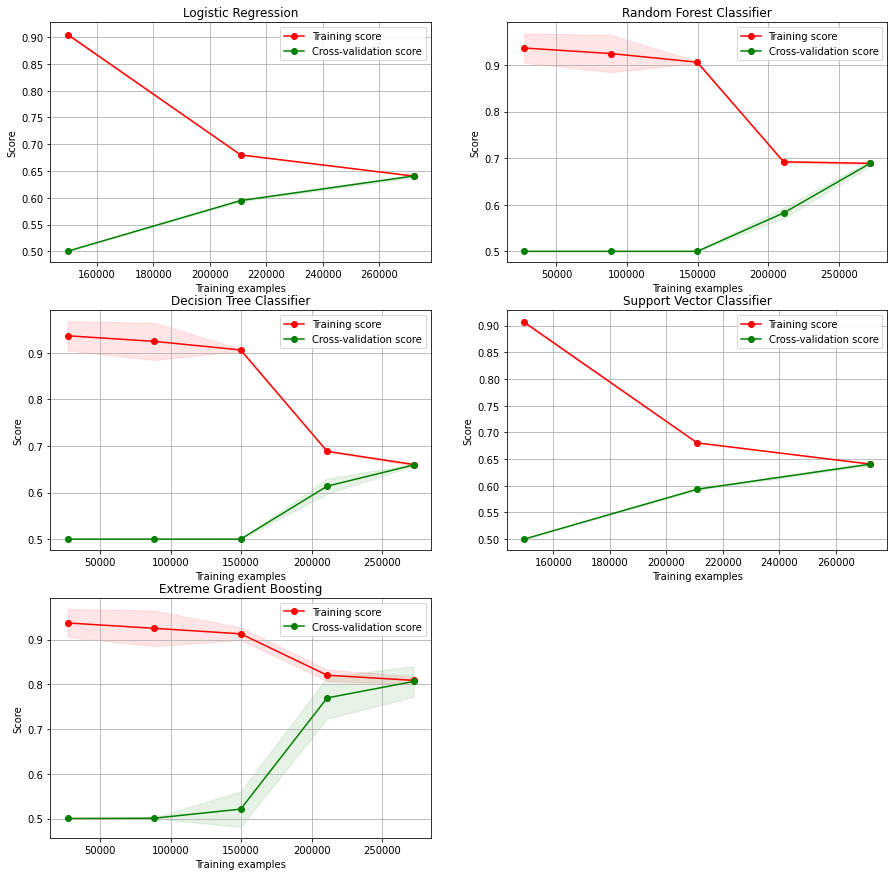

In [24]:
#Variables
n_jobs = 10
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)

#Classifiers
log_reg = hyperparameter_tuned_classfier["Logistic Regression"]
svc = hyperparameter_tuned_classfier["Support Vector Classifier"]
decision_tree = hyperparameter_tuned_classfier["Decision Tree"]
RandomForest = hyperparameter_tuned_classfier["RandomForest"]
xgboost = hyperparameter_tuned_classfier["Gradient Boosting"]

#log_reg = randomsearch(LogisticRegression(), params['Logistic Regression'])
#svc = randomsearch(LinearSVC(), params['Support Vector Classifier'])
#decision_tree = randomsearch(DecisionTreeClassifier(), params['Decision Tree'])
#RandomForest = randomsearch(RandomForestClassifier(), params['RandomForest'])
#xgboost = randomsearch(XGBClassifier(), params['Gradient Boosting'])

plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plot_learning_curve(log_reg, 'Logistic Regression', X_train_SMOTE, y_train_SMOTE, n_jobs=-1)

plt.subplot(3,2,2)
plot_learning_curve(RandomForest, 'Random Forest Classifier', X_train_SMOTE, y_train_SMOTE, n_jobs=-1)

plt.subplot(3,2,3)
plot_learning_curve(decision_tree, 'Decision Tree Classifier', X_train_SMOTE, y_train_SMOTE, n_jobs=-1)

plt.subplot(3,2,4)
plot_learning_curve(svc, 'Support Vector Classifier', X_train_SMOTE, y_train_SMOTE, n_jobs=-1)

plt.subplot(3,2,5)
plot_learning_curve(xgboost, 'Extreme Gradient Boosting', X_train_SMOTE, y_train_SMOTE, n_jobs=-1)

#plt.show()

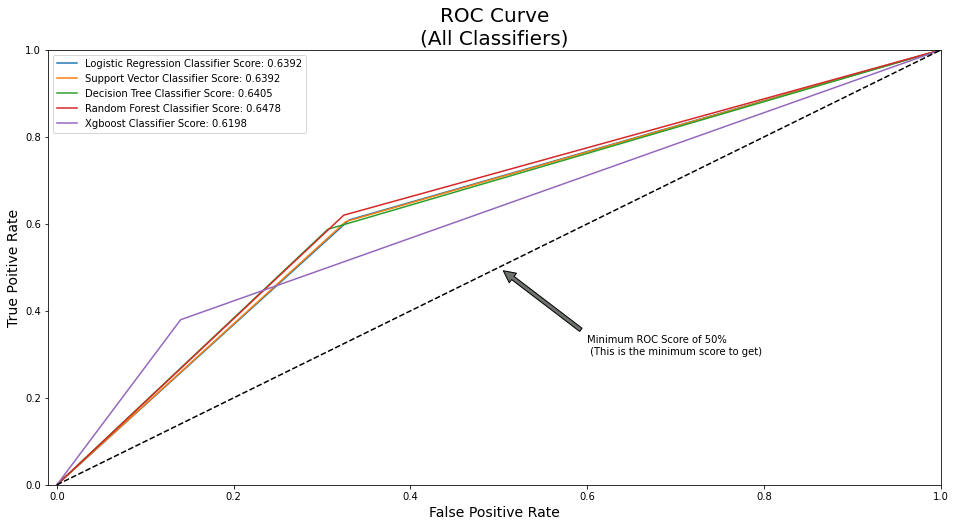

In [25]:
#ROC Curve
'''log_pred = cross_val_predict(log_reg, X_train, y_train, cv=5)
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5)
tree_pred = cross_val_predict(decision_tree, X_train, y_train, cv=5)
knear_pred = cross_val_predict(knearest, X_train, y_train, cv=5)'''

log_pred = log_reg.predict(X_test_stand)
svc_pred = svc.predict(X_test_stand)
tree_pred = decision_tree.predict(X_test_stand)
RandomForeest_pred = RandomForest.predict(X_test_stand)
Xgboost_pred = xgboost.predict(X_test_stand)

log_fpr, log_tpr, log_threshold = roc_curve(y_test, log_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, tree_pred)
RF_fpr, RF_tpr, RF_threshold = roc_curve(y_test, RandomForeest_pred)
xgboost_fpr, xgboost_tpr, xgboost_threshold = roc_curve(y_test, Xgboost_pred)

plt.figure(figsize=(16,8))
plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, log_pred)))
plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, svc_pred)))
plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, tree_pred)))

plt.plot(RF_fpr, RF_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, RandomForeest_pred)))
plt.plot(xgboost_fpr, xgboost_tpr, label='Xgboost Classifier Score: {:.4f}'.format(roc_auc_score(y_test, Xgboost_pred)))

plt.plot([0,1],[0,1],'k--')
plt.axis([-0.01, 1, 0, 1])

plt.title('ROC Curve\n(All Classifiers)', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Poitive Rate', fontsize=14)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
plt.legend()
plt.show()

In [26]:
labels = ['Non-Default', 'Default']

print('Logistic Regression:')
print(classification_report(y_test, log_pred, target_names=labels))

print('Support Vector Classifier:')
print(classification_report(y_test, svc_pred, target_names=labels))

print('Decision Tree:')
print(classification_report(y_test, tree_pred, target_names=labels))

print('Random Forest Classifier:')
print(classification_report(y_test, RandomForeest_pred, target_names=labels))

print('Extreme Gradient Boosting Classifier:')
print(classification_report(y_test, Xgboost_pred, target_names=labels))

Logistic Regression:
              precision    recall  f1-score   support

 Non-Default       0.95      0.67      0.79     73024
     Default       0.13      0.61      0.22      6024

    accuracy                           0.66     79048
   macro avg       0.54      0.64      0.50     79048
weighted avg       0.89      0.66      0.74     79048

Support Vector Classifier:
              precision    recall  f1-score   support

 Non-Default       0.95      0.67      0.79     73024
     Default       0.13      0.61      0.22      6024

    accuracy                           0.67     79048
   macro avg       0.54      0.64      0.50     79048
weighted avg       0.89      0.67      0.75     79048

Decision Tree:
              precision    recall  f1-score   support

 Non-Default       0.95      0.69      0.80     73024
     Default       0.14      0.59      0.22      6024

    accuracy                           0.69     79048
   macro avg       0.54      0.64      0.51     79048
weighted av

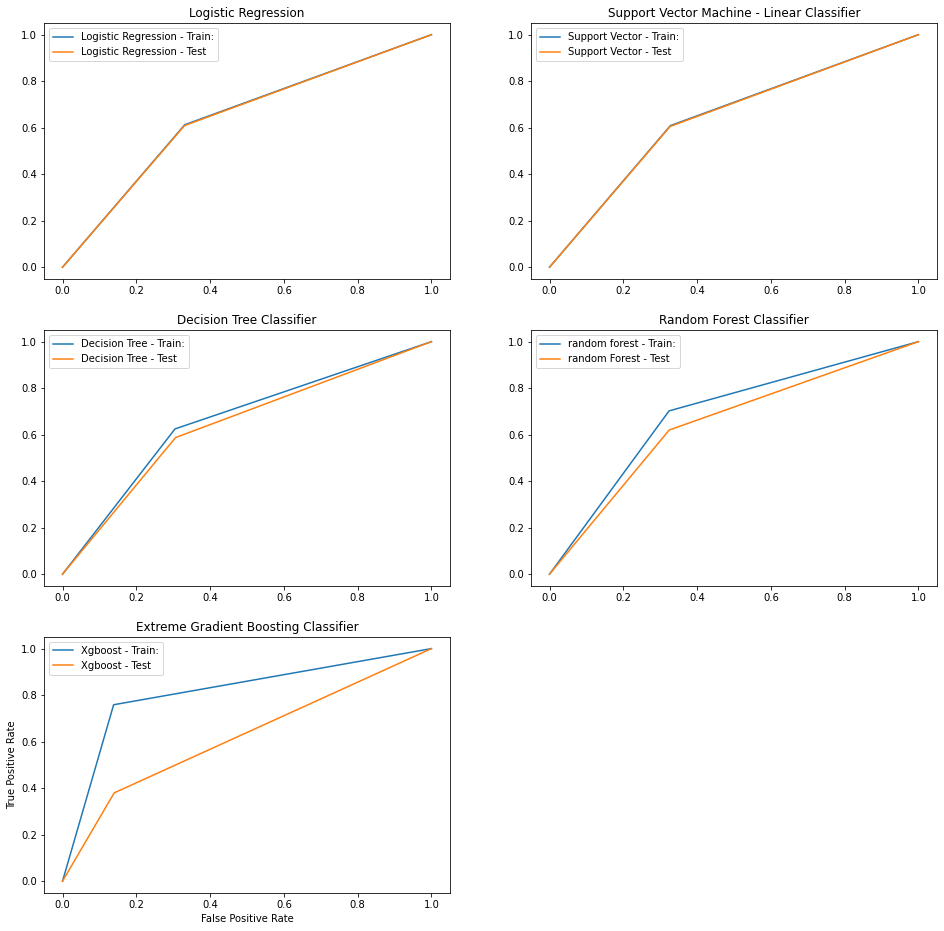

In [120]:
def plot_auc_roc_train_test(X_train, X_test, y_train, y_test, classifier):
    train_pred = classifier.predict(X_train)
    test_pred =  classifier.predict(X_test)
    train_fpr, train_tpr, train_threshold = roc_curve(y_train, train_pred)
    test_fpr, test_tpr, test_threshold = roc_curve(y_test, test_pred)
    
    return train_fpr, train_tpr, test_fpr, test_tpr,roc_curve(y_test, test_pred),roc_curve(y_train, train_pred)

plt.figure(figsize=(16,16))
plt.subplot(3,2,1)
train_fpr, train_tpr, test_fpr, test_tpr,test_roc, train_roc = plot_auc_roc_train_test(X_train_SMOTE, X_test_stand, y_train_SMOTE, y_test, log_reg)
plt.plot(train_fpr, train_tpr, label='Logistic Regression - Train:')
plt.plot(test_fpr, test_tpr, label='Logistic Regression - Test')
plt.title("Logistic Regression")
plt.legend()

plt.subplot(3,2,2)
train_fpr, train_tpr, test_fpr, test_tpr,test_roc, train_roc = plot_auc_roc_train_test(X_train_SMOTE, X_test_stand, y_train_SMOTE, y_test, svc)
plt.plot(train_fpr, train_tpr, label='Support Vector - Train:')
plt.plot(test_fpr, test_tpr, label='Support Vector - Test')
plt.title("Support Vector Machine - Linear Classifier")
plt.legend()


plt.subplot(3,2,3)
train_fpr, train_tpr, test_fpr, test_tpr,test_roc, train_roc = plot_auc_roc_train_test(X_train_SMOTE, X_test_stand, y_train_SMOTE, y_test, decision_tree)
plt.plot(train_fpr, train_tpr, label='Decision Tree - Train:')
plt.plot(test_fpr, test_tpr, label='Decision Tree - Test')
plt.title("Decision Tree Classifier")
plt.legend()

plt.subplot(3,2,4)
train_fpr, train_tpr, test_fpr, test_tpr,test_roc, train_roc = plot_auc_roc_train_test(X_train_SMOTE, X_test_stand, y_train_SMOTE, y_test, RandomForest)
plt.plot(train_fpr, train_tpr, label='random forest - Train:')
plt.plot(test_fpr, test_tpr, label='random Forest - Test')
plt.title("Random Forest Classifier")
plt.legend()

plt.subplot(3,2,5)
train_fpr, train_tpr, test_fpr, test_tpr,test_roc, train_roc = plot_auc_roc_train_test(X_train_SMOTE, X_test_stand, y_train_SMOTE, y_test, xgboost)
plt.plot(train_fpr, train_tpr, label='Xgboost - Train:')
plt.plot(test_fpr, test_tpr, label='Xgboost - Test')
plt.title("Extreme Gradient Boosting Classifier")
plt.legend()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


In [27]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[48872 24152]
 [ 2354  3670]]
Confusion matrix, without normalization
[[49160 23864]
 [ 2378  3646]]
Confusion matrix, without normalization
[[50648 22376]
 [ 2485  3539]]
Confusion matrix, without normalization
[[49328 23696]
 [ 2289  3735]]
Confusion matrix, without normalization
[[62801 10223]
 [ 3737  2287]]
Confusion matrix, without normalization
[[73024     0]
 [    0  6024]]


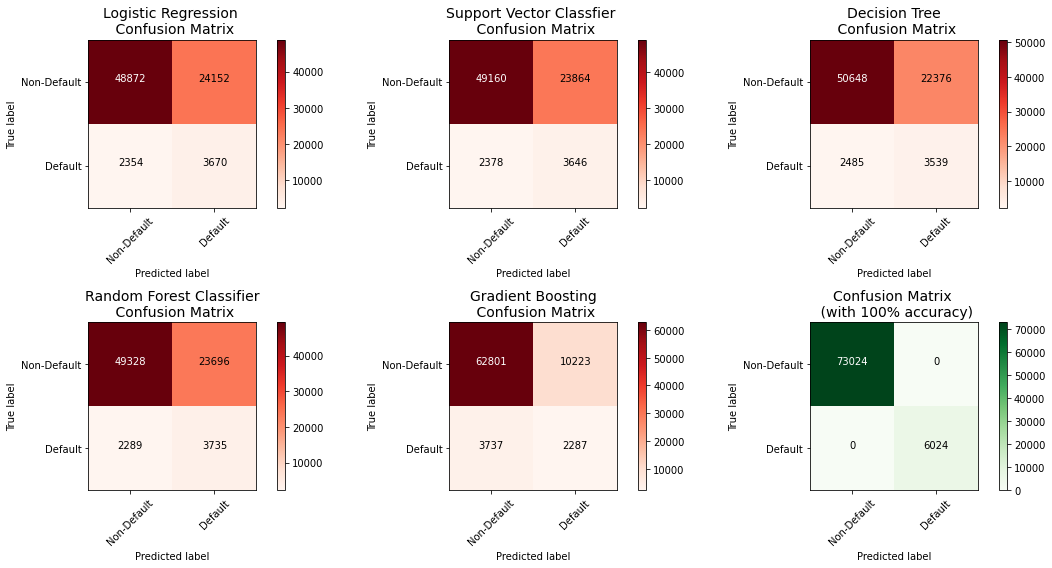

In [28]:
from sklearn.metrics import confusion_matrix
log_reg_cm = confusion_matrix(y_test, log_reg.predict(X_test_stand))
svc_cm = confusion_matrix(y_test, svc.predict(X_test_stand))
dt_cm = confusion_matrix(y_test, decision_tree.predict(X_test_stand))
RF_cm = confusion_matrix(y_test, RandomForest.predict(X_test_stand))
xgboost_cm = confusion_matrix(y_test, xgboost.predict(X_test_stand))

actual_cm = confusion_matrix(y_test, y_test)
labels = ['Non-Default', 'Default']


fig = plt.figure(figsize=(16,8))

fig.add_subplot(231)
plot_confusion_matrix(log_reg_cm, labels, title="Logistic Regression \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(232)
plot_confusion_matrix(svc_cm, labels, title="Support Vector Classfier \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(233)
plot_confusion_matrix(dt_cm, labels, title="Decision Tree\n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(234)
plot_confusion_matrix(RF_cm, labels, title="Random Forest Classifier\n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(235)
plot_confusion_matrix(xgboost_cm, labels, title="Gradient Boosting\n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(236)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

plt.show()

# Feature Importance

Logistic - Regression Feature: 0, Score: -0.11565
Logistic - Regression Feature: 1, Score: -0.48949
Logistic - Regression Feature: 2, Score: -0.21987
Logistic - Regression Feature: 3, Score: 0.14708
Logistic - Regression Feature: 4, Score: 0.01721
Logistic - Regression Feature: 5, Score: 0.06201
Logistic - Regression Feature: 6, Score: -0.03541
Logistic - Regression Feature: 7, Score: -0.09457
Logistic - Regression Feature: 8, Score: 0.10158
Logistic - Regression Feature: 9, Score: -0.00645
Logistic - Regression Feature: 10, Score: -0.00956
Logistic - Regression Feature: 11, Score: 0.01255
Logistic - Regression Feature: 12, Score: 0.03992
Logistic - Regression Feature: 13, Score: -0.10344
Logistic - Regression Feature: 14, Score: 0.08178
Logistic - Regression Feature: 15, Score: 0.01349
Logistic - Regression Feature: 16, Score: 0.07993
Logistic - Regression Feature: 17, Score: -0.18435
[-0.05278214 -0.22038567 -0.10004377  0.06642511  0.00785641  0.02854938
 -0.01560097 -0.04224583  0.

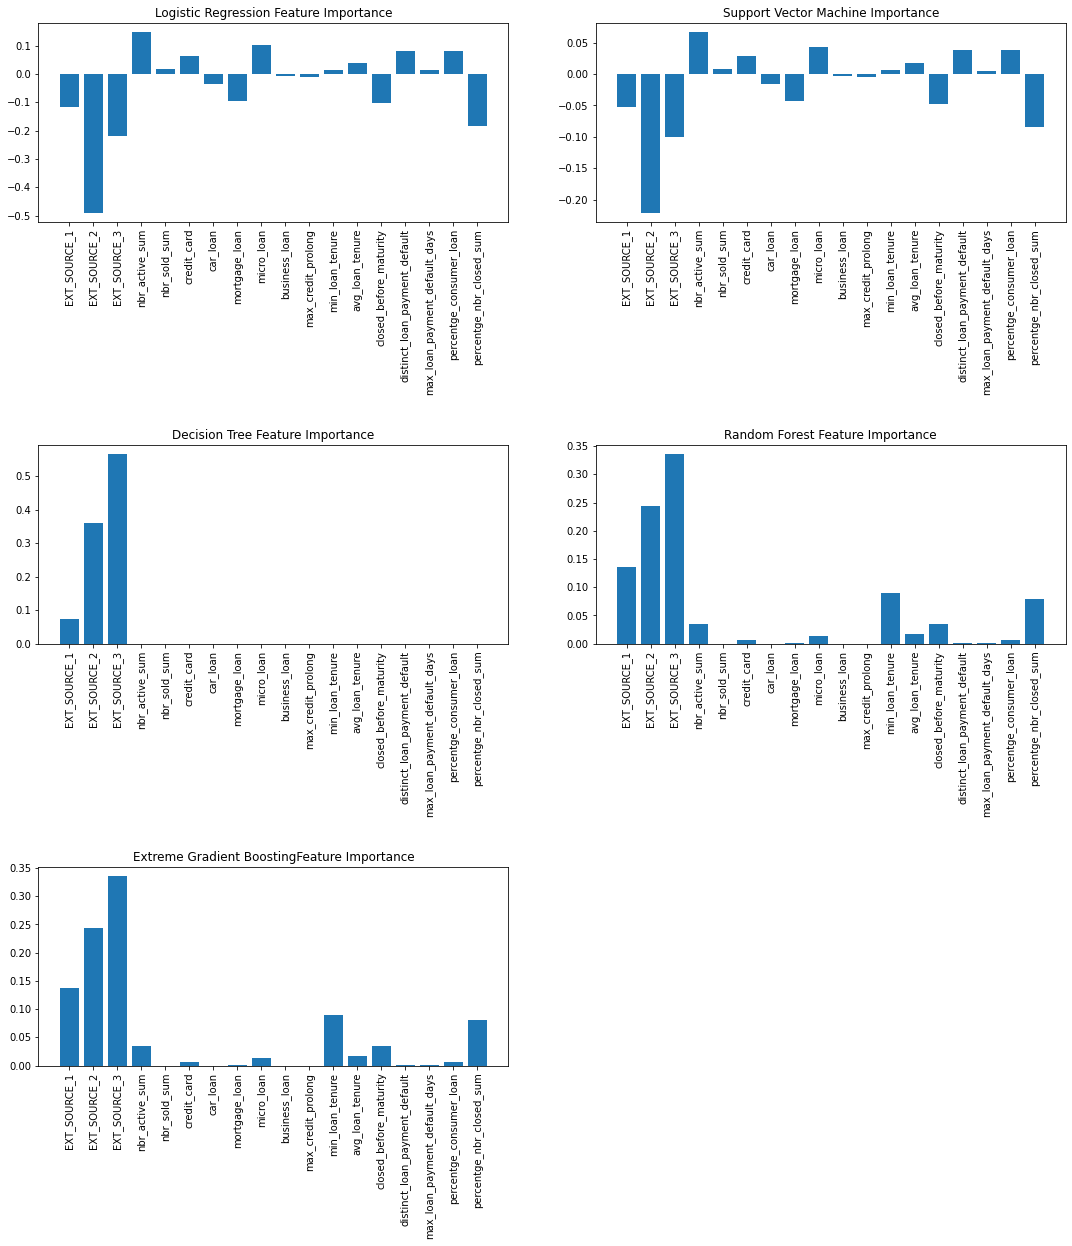

In [29]:
cols = list(X.columns)
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
importance_log_reg = log_reg.coef_[0]

for i,v in enumerate(importance_log_reg):
    print('Logistic - Regression Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(cols, importance_log_reg)
plt.xticks(rotation = 90)
plt.title("Logistic Regression Feature Importance")
plt.tight_layout(h_pad = 5, w_pad=5)

plt.subplot(3,2,2)
importance_svc = svc.coef_[0]
print(importance_svc)
for i,v in enumerate(importance_svc):
    print('SVM: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(cols, importance_svc)
plt.xticks(rotation = 90)
plt.title("Support Vector Machine Importance")
plt.tight_layout(h_pad = 5, w_pad=5)

plt.subplot(3,2,3)
# get importance
importance_decision_tree = decision_tree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_decision_tree):
	print('Decision Tree-Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(cols, importance_decision_tree)
plt.xticks(rotation = 90)
plt.title("Decision Tree Feature Importance")

plt.subplot(3,2,4)
importance_RandomForest = RandomForest.feature_importances_
for i,v in enumerate(importance_RandomForest):
	print('Random Forest Feature: %0d, Score: %.5f' % (i,v))

plt.bar(cols, importance_RandomForest)
plt.xticks(rotation = 90)
plt.title("Random Forest Feature Importance")

plt.subplot(3,2,5)
importance_Xgboost = xgboost.feature_importances_
for i,v in enumerate(importance_Xgboost):
	print('Extreme Gradient Boosting: %0d, Score: %.5f' % (i,v))

plt.bar(cols, importance_RandomForest)
plt.xticks(rotation = 90)
plt.title("Extreme Gradient BoostingFeature Importance")
plt.xticks(rotation = 90) 
plt.show()




# LIME

In [30]:
import lime #LIME package
import lime.lime_tabular #the type of LIIME analysis we’ll do
import shap #SHAP package

In [31]:
feature_names = X_train_SMOTE.columns

In [32]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_SMOTE.values, 
                                                   feature_names=feature_names, 
                                                   class_names=["Non Default", "Default"], 
                                                   verbose=True, mode='classification')

In [33]:
predict_fn_lg = lambda x: log_reg.predict_proba(x).astype(float)
predict_fn_svm = lambda x: svc._predict_proba_lr(x).astype(float)
predict_fn_dt = lambda x: decision_tree.predict_proba(x).astype(float)
predict_fn_rf = lambda x: RandomForest.predict_proba(x).astype(float)
predict_fn_xgboost = lambda x: xgboost.predict_proba(x).astype(float)

In [34]:
np.random.seed(1)
i = 19
exp_lg = explainer.explain_instance(X_train[feature_names].values[i], predict_fn_lg, num_features=5)
exp_svm = explainer.explain_instance(X_train[feature_names].values[i], predict_fn_svm, num_features=5)
exp_dt = explainer.explain_instance(X_train[feature_names].values[i], predict_fn_dt, num_features=5)
exp_rf = explainer.explain_instance(X_train[feature_names].values[i], predict_fn_rf, num_features=5)
exp_xgboost = explainer.explain_instance(X_train[feature_names].values[i], predict_fn_xgboost, num_features=5)
#exp_lg.show_in_notebook(show_all=False)

Intercept 0.5314985165299193
Prediction_local [0.55906939]
Right: 0.3438904695709807
Intercept 0.514151448009843
Prediction_local [0.5159837]
Right: 0.42687856067786145
Intercept 0.5065026191196745
Prediction_local [0.40104]
Right: 0.3115983403753188
Intercept 0.5465912061653087
Prediction_local [0.45402251]
Right: 0.3995999766387925
Intercept 0.8862629599900227
Prediction_local [0.76794598]
Right: 0.603685200214386


In [35]:
exp_lg.show_in_notebook()

In [36]:
exp_dt.show_in_notebook()

In [37]:
exp_rf.show_in_notebook()

In [38]:
exp_xgboost.show_in_notebook()

In [39]:
X_train.head()

EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  nbr_active_sum  \
253580     -1.000000      0.625002      0.758393               1   
85069      -1.000000      0.702550      0.684828               1   
137565      0.569668      0.652715      0.750375               5   
108557      0.816484      0.674434      0.524496               1   
66406      -1.000000      0.354430      0.785052               0   

        nbr_sold_sum  credit_card  car_loan  mortgage_loan  micro_loan  \
253580             0            0         0              0           0   
85069              0            1         0              0           0   
137565             0            4         0              0           0   
108557             0            0         0              0           0   
66406              0            0         0              0           0   

        business_loan  max_credit_prolong  min_loan_tenure  avg_loan_tenure  \
253580              0                   0              0.0              2.0   
85069               0                   1              0.0              8.0   
137565              0                   0              0.0              8.0   
108557              0                   0              1.0              1.0   
66406               0                   0              0.0              0.0   

        closed_before_maturity  distinct_loan_payment_default  \
253580                       1                              0   
85069                        0                              0   
137565                       6                              0   
108557                       0                              0   
66406                        1                              0   

        max_loan_payment_default_days  percentge_consumer_loan  \
253580                            0.0                 1.000000   
85069                             0.0                 0.750000   
137565                            0.0                 0.636364   
108557                            0.0                 1.000000   
66406                             0.0                 1.000000   

        percentge_nbr_closed_sum  
253580                  0.750000  
85069                   0.750000  
137565                  0.545455  
108557                  0.000000  
66406                   1.000000

In [40]:
final_cols = X_train_SMOTE.columns
final_cols

Index(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'nbr_active_sum',
       'nbr_sold_sum', 'credit_card', 'car_loan', 'mortgage_loan',
       'micro_loan', 'business_loan', 'max_credit_prolong', 'min_loan_tenure',
       'avg_loan_tenure', 'closed_before_maturity',
       'distinct_loan_payment_default', 'max_loan_payment_default_days',
       'percentge_consumer_loan', 'percentge_nbr_closed_sum'],
      dtype='object')

In [41]:
df_stand = df.copy()

In [42]:
for i in num_cols:    
    # transform the testing data column
    df_stand[i] = scale.transform(df[[i]])
df_stand.head()

SK_ID_CURR  TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0      100002       1     -1.617595     -1.041168     -1.437089   
1      100003       0     -0.886357      0.110002     -5.087591   
2      100004       0     -5.087591     -0.102527      0.453853   
3      100007       0     -5.087591     -0.849605     -5.087591   
4      100008       0     -5.087591     -0.748724      0.106736   

   nbr_active_sum  nbr_sold_sum  credit_card  car_loan  mortgage_loan  \
0        4.524257     -1.883642    10.932157 -1.883642      -1.883642   
1        1.320308     -1.883642     4.524257 -1.883642      -1.883642   
2       -1.883642     -1.883642    -1.883642 -1.883642      -1.883642   
3       -1.883642     -1.883642    -1.883642 -1.883642      -1.883642   
4        1.320308     -1.883642    -1.883642 -1.883642      -1.883642   

   micro_loan  business_loan  max_credit_prolong  min_loan_tenure  \
0   -1.883642      -1.883642           -1.883642        -1.883642   
1   -1.883642      -1.883642           -1.883642        -1.883642   
2   -1.883642      -1.883642           -1.883642        -1.883642   
3   -1.883642      -1.883642           -1.883642         1.320308   
4   -1.883642      -1.883642           -1.883642        -1.883642   

   avg_loan_tenure  closed_before_maturity  distinct_loan_payment_default  \
0         1.320308                7.728207                       7.728207   
1         4.524257                1.320308                      -1.883642   
2         1.320308                1.320308                      -1.883642   
3         1.320308               -1.883642                      -1.883642   
4         1.320308                1.320308                      -1.883642   

   max_loan_payment_default_days  percentge_consumer_loan  \
0                       1.320308                -0.281667   
1                      -1.883642                -0.281667   
2                      -1.883642                 1.320308   
3                      -1.883642                 1.320308   
4                      -1.883642                 1.320308   

   percentge_nbr_closed_sum  
0                  0.519320  
1                  0.519320  
2                  1.320308  
3                  1.320308  
4                  0.252325

In [43]:
# Final  Model - XgBoost
Xgboost_final_pred = pd.DataFrame(xgboost.predict_proba(df_stand[final_cols]),columns = ["DEFAULT_SCORE", "NON_DEFAULT"])

In [44]:
Bureau_score = pd.merge(Xgboost_final_pred, df, left_index=True, right_index=True)
Bureau_score.head()

DEFAULT_SCORE  NON_DEFAULT  SK_ID_CURR  TARGET  EXT_SOURCE_1  EXT_SOURCE_2  \
0       0.569621     0.430379      100002       1      0.083037      0.262949   
1       0.704096     0.295904      100003       0      0.311267      0.622246   
2       0.641078     0.358922      100004       0     -1.000000      0.555912   
3       0.436205     0.563795      100007       0     -1.000000      0.322738   
4       0.593807     0.406194      100008       0     -1.000000      0.354225   

   EXT_SOURCE_3  nbr_active_sum  nbr_sold_sum  credit_card  car_loan  \
0      0.139376               2             0            4         0   
1     -1.000000               1             0            2         0   
2      0.729567               0             0            0         0   
3     -1.000000               0             0            0         0   
4      0.621226               1             0            0         0   

   mortgage_loan  micro_loan  business_loan  max_credit_prolong  \
0              0           0              0                   0   
1              0           0              0                   0   
2              0           0              0                   0   
3              0           0              0                   0   
4              0           0              0                   0   

   min_loan_tenure  avg_loan_tenure  closed_before_maturity  \
0              0.0              1.0                       3   
1              0.0              2.0                       1   
2              0.0              1.0                       1   
3              1.0              1.0                       0   
4              0.0              1.0                       1   

   distinct_loan_payment_default  max_loan_payment_default_days  \
0                              3                            1.0   
1                              0                            0.0   
2                              0                            0.0   
3                              0                            0.0   
4                              0                            0.0   

   percentge_consumer_loan  percentge_nbr_closed_sum  
0                      0.5                  0.750000  
1                      0.5                  0.750000  
2                      1.0                  1.000000  
3                      1.0                  1.000000  
4                      1.0                  0.666667

In [45]:
Bureau_score = Bureau_score[["SK_ID_CURR","DEFAULT_SCORE", "TARGET"]]

In [46]:
Bureau_score.head()

SK_ID_CURR  DEFAULT_SCORE  TARGET
0      100002       0.569621       1
1      100003       0.704096       0
2      100004       0.641078       0
3      100007       0.436205       0
4      100008       0.593807       0

In [121]:
Bureau_score.to_csv("Scores/bureau_score.csv", index = False)

# SHAP

In [48]:
import shap #SHAP package

In [49]:
explainerRandomForest = shap.TreeExplainer(RandomForest)
shap_values_RF_test = explainerRandomForest.shap_values(X_test_stand)
shap_values_RF_train = explainerRandomForest.shap_values(X_train_stand)

In [50]:
df_shap_RF_test = pd.DataFrame(shap_values_RF_test[0], columns=X_test_stand.columns.values)
df_shap_RF_train = pd.DataFrame(shap_values_RF_train[0], columns=X_test_stand.columns.values)

In [51]:
# j will be the record we explain
j = 0
# initialize js for SHAP
shap.initjs()

In [52]:
shap.force_plot(explainerRandomForest.expected_value, shap_values_RF_test[j], X_test_stand.iloc[[j]])

Exception: In v0.20 force_plot now requires the base value as the first parameter! Try shap.force_plot(explainer.expected_value, shap_values) or for multi-output models try shap.force_plot(explainer.expected_value[0], shap_values[0]).

In [ ]:
# Score of Bureau Data
# SHAP Implementation